<a href="https://colab.research.google.com/github/rahmanziaur/DTClassifierTest/blob/main/parallelSpeedUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

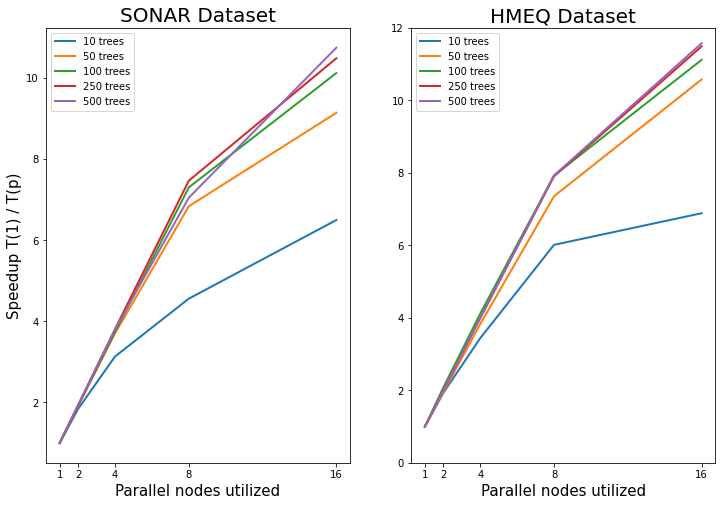

In [ ]:
#!/usr/bin/python

# Import necessary packages
import matplotlib.pyplot as plt

# Record elapsed time in seconds as provided by time function
# SONAR Dataset in node ascending order
sonar_10 =   [1.222     , 0.664     , 0.390 , 0.268 , 0.188]
sonar_50 =   [6.264     , 3.273     , 1.692 , 0.916 , 0.685]
sonar_100 =  [12.716    , 6.613     , 3.403 , 1.741 , 1.256]
sonar_250 =  [31.801    , 16.438    , 8.346 , 4.258 , 3.032]
sonar_500 =  [60*1+3.381, 32.732    , 16.671, 8.991 , 5.896]
sonar_1000 = [60*2+6.793, 60*1+5.716, 33.195, 16.728, 11.738]

# Record elapsed time in seconds as provided by time function
# HMEQ Dataset in node ascending order
hmeq_10 =  [60*2+20.621  , 60*1+12.871 , 40.891      , 23.382      , 20.419]
hmeq_50 =  [60*11+16.809 , 60*5+47.126 , 60*2+56.865 , 60*1+32.011 , 60*1+3.991]
hmeq_100 = [60*25+35.081 , 60*12+18.531, 60*6+12.955 , 60*3+13.664 , 60*2+18.063]
hmeq_250 = [60*62+13.698 , 60*31+6.893 , 60*15+35.199, 60*7+52.247 , 60*5+24.929]
hmeq_500 = [60*123+56.576, 60*62+11.926, 60*31+1.601 , 60*15+37.796, 60*10+42.419]
# parallel_hmeq_1000 = [60*11+16.809, ?, ?, ?, ?]

# Gather
list_of_times = [sonar_10, sonar_50, sonar_100, sonar_250, sonar_500,
                hmeq_10, hmeq_50, hmeq_100, hmeq_250, hmeq_500]
list_of_trees = [10, 50, 100, 250, 500]

# Calculate speedup
speedup = []
for times in list_of_times:
    speedup_times = [times[0] / times[i] for i in range(5)]
    speedup.append(speedup_times)
nodes = [1, 2, 4, 8, 16]

# Plot Speedup Chart
fig, ax = plt.subplots(1, 2, figsize=(12,8))
plt.ylim(0, 12)

# Plot SONAR Speed Up
pos = 0
for i in range(2):
    for j in range(5): # TODO: add _1000 once done
        ax[i].plot(nodes, speedup[pos], lw=2, label=f'{str(list_of_trees[j])} trees')
        pos+=1

ax[0].set_ylabel("Speedup T(1) / T(p)", size=15)
ax[0].set_xlabel("Parallel nodes utilized", size=15)
ax[1].set_xlabel("Parallel nodes utilized", size=15)

ax[0].set_title("SONAR Dataset", size=20)
ax[1].set_title("HMEQ Dataset", size=20)

ax[0].set_xticks(nodes)
ax[1].set_xticks(nodes)

# Plot HMEQ Speed Up
ax[0].legend(loc=2)
ax[1].legend(loc=2)
plt.savefig("SpeedUp_OpenMP.png")
plt.show()